In [296]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import display, Markdown
import seaborn as sns

In [297]:


from src.make_db import create_movies_db

create_movies_db()




imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [631]:
df = pd.read_sql("select * from tn_movie_budgets;", con)
df.head(10)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [630]:
tn_movie_budgets = pd.read_sql("select * from imdb_title_basics;", con)
tn_movie_budgets.head(10)

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [507]:
con = sqlite3.connect('data/movies.db')

In [508]:

df = pd.read_sql("select * from imdb_title_akas;", con)



df1 = df[df['title_id'].str.contains("tt2488496") & df['region'].str.contains("US")]
df1

,idx,title_id,ordering,title,region,language,types,attributes,is_original_title
110016,110016,tt2488496,39,Star Wars: The Force Awakens,US,None,None,poster title,0.0
110031,110031,tt2488496,52,Star Wars: Episode VII - The Force Awakens,US,None,None,None,0.0


In [546]:
def rm_comma_and_dollar(arg1, arg2):
    df = arg1
    column = arg2
    df[column] = df[column].str.replace(',', '', regex = True)
    df[column] = df[column].str.replace('$', '', regex = True).astype(int)
    return df

In [547]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idx                5782 non-null   int64         
 1   id                 5782 non-null   int64         
 2   release_date       5782 non-null   datetime64[ns]
 3   movie              5782 non-null   object        
 4   production_budget  5782 non-null   int64         
 5   domestic_gross     5782 non-null   int64         
 6   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 316.3+ KB


In [549]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '', regex = True)
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '', regex = True).astype(int)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '', regex = True)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '', regex = True).astype(int)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '', regex = True)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '', regex = True).astype(int)



In [550]:
tn_movie_budgets.release_date = pd.to_datetime(tn_movie_budgets.release_date)

In [560]:

tndfp = tn_movie_budgets[(tn_movie_budgets['release_date'] >= '2010-01-01') & (tn_movie_budgets['release_date'] <= '2020-01-01')]
#date = df.sort_values(by='popularity',ascending=False)
#tndf = tndf[(tndf['production_budget'] >= 10000000)]
tndf

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
...,...,...,...,...,...,...,...
5761,5761,62,2014-12-31,Stories of Our Lives,15000,0,0
5771,5771,72,2015-05-19,Family Motocross,10000,0,0
5772,5772,73,2012-01-13,Newlyweds,9000,4584,4584
5777,5777,78,2018-12-31,Red 11,7000,0,0


In [559]:
tndfp = tndf[(tndf['net_profit'] >= 0)]
plot_one_fig, plot_one_ax = plt.subplots(figsize=(13,6))
plot_one_ax.scatter(tndf['production_budget'], tndf['net_profit'])

#sns.scatterplot(data=tndf, x="production_budget", y="net_profit")

KeyError: 'net_profit'

In [556]:
tndfp = tndf[(tndf['net_profit'] >= tndf['production_budget'])]
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(tndfp.production_budget)
ax.hist(tndfp['production_budget'], 20)
plt.xticks(bins)

KeyError: 'net_profit'

In [561]:
tndfp.sort_values(by = 'production_budget', ascending=False)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
...,...,...,...,...,...,...,...
5761,5761,62,2014-12-31,Stories of Our Lives,15000,0,0
5771,5771,72,2015-05-19,Family Motocross,10000,0,0
5772,5772,73,2012-01-13,Newlyweds,9000,4584,4584
5777,5777,78,2018-12-31,Red 11,7000,0,0


In [523]:
# tndfp = tndf[(tndf['production_budget'] <= 300000000) & (tndf['net_profit'] >= 10*tndf['production_budget'])]

# fig = plt.figure(figsize=(16,6))
# n, bins, patches = plt.hist(tndfp.production_budget)
# ax.hist(tndfp['production_budget'], 20)
# plt.xticks(bins)

In [562]:
tndfp['logged_budget'] = np.log(tndfp['production_budget'])
tndfp['total_gross'] = tndfp['worldwide_gross'] + tndfp['domestic_gross'] 
tndfp['net_profit'] = tndfp['total_gross'] - tndfp['production_budget']
tndfp['return_on_investment'] = tndfp['total_gross'] / tndfp['production_budget']

<ipython-input-562-f5664171dcff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndfp['logged_budget'] = np.log(tndfp['production_budget'])
<ipython-input-562-f5664171dcff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndfp['total_gross'] = tndfp['worldwide_gross'] + tndfp['domestic_gross']
<ipython-input-562-f5664171dcff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [563]:
log_budget_mean = tndfp['logged_budget'].mean()
log_budget_std = tndfp['logged_budget'].std()
upper_thresh = log_budget_mean + log_budget_std * 2
lower_thresh = log_budget_mean - log_budget_std * 2

nrml = tndfp[(tndfp.logged_budget > lower_thresh) & (tndfp.logged_budget < upper_thresh)]

In [564]:
big_winners = nrml.sort_values(by = 'return_on_investment', ascending=False).head(100)
big_losers = nrml.sort_values(by = 'return_on_investment').head(100)

<AxesSubplot:xlabel='production_budget', ylabel='net_profit'>

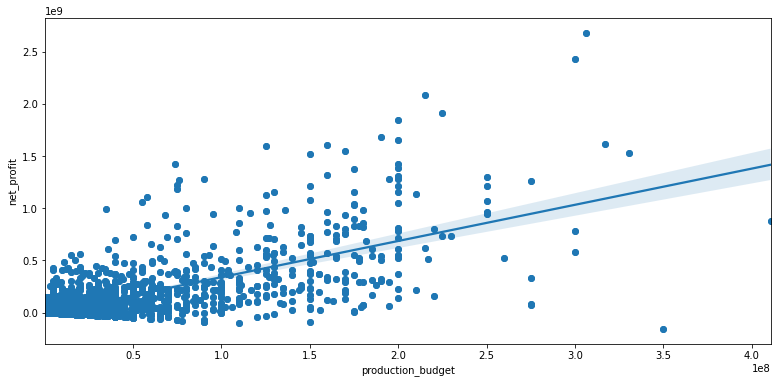

In [565]:
plot_one_fig, plot_one_ax = plt.subplots(figsize=(13,6))
plot_one_ax.scatter(nrml['production_budget'], nrml['net_profit'])
sns.regplot (data = nrml, x='production_budget', y= 'net_profit')

In [629]:
big_losers.head(50)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,logged_budget,total_gross,net_profit,return_on_investment
5566,5566,67,2010-12-31,Death Calls,290000,0,0,12.577636,0,-290000,0.0
4865,4865,66,2016-01-19,Eden,2300000,0,0,14.648420,0,-2300000,0.0
4882,4882,83,2012-12-31,Infected,2100000,0,0,14.557448,0,-2100000,0.0
4883,4883,84,2010-12-31,Lies in Plain Sight,2100000,0,0,14.557448,0,-2100000,0.0
4884,4884,85,2015-10-06,The Timber,2100000,0,0,14.557448,0,-2100000,0.0
4885,4885,86,2016-01-19,Sharkskin,2100000,0,0,14.557448,0,-2100000,0.0
671,671,72,2019-12-31,355,75000000,0,0,18.132999,0,-75000000,0.0
670,670,71,2019-08-30,PLAYMOBIL,75000000,0,0,18.132999,0,-75000000,0.0
4985,4985,86,2015-03-17,The Lady from Shanghai,2000000,0,0,14.508658,0,-2000000,0.0
4986,4986,87,2013-03-19,Straight A's,2000000,0,0,14.508658,0,-2000000,0.0


([<matplotlib.axis.YTick at 0x7fdc7c76a310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

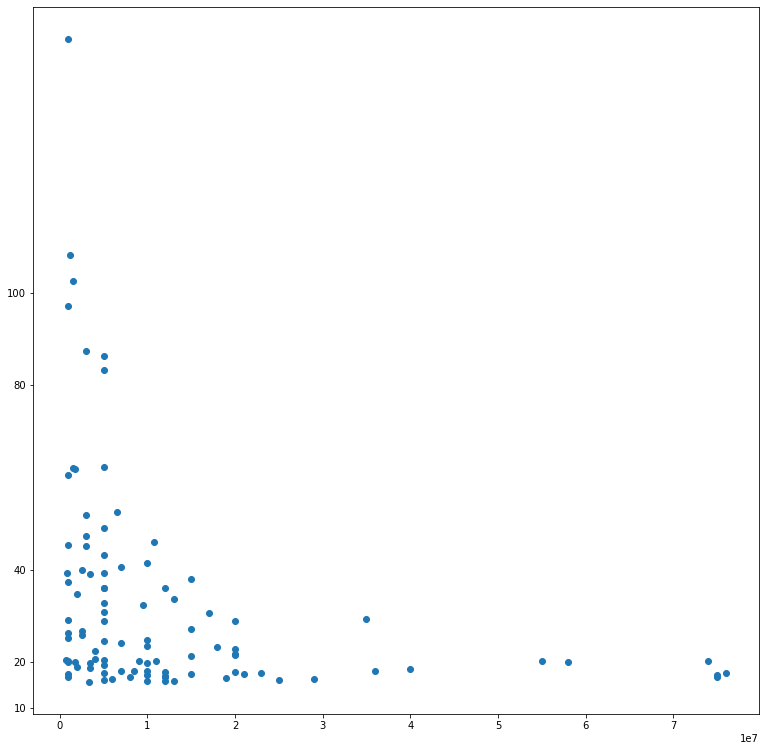

In [570]:
#tndfp = tndf[(tndf['net_profit'] >= 0)]
plot_one_fig, plot_one_ax = plt.subplots(figsize=(13,13))
plot_one_ax.scatter(big_winners['production_budget'], big_winners['return_on_investment'])
plt.yticks([10,20,40,80, 100])

In [ ]:
"how man films within each budget group achieved a 2* return on investment"

In [567]:
big_winners.sort_values(by = 'return_on_investment', ascending=False).head(50)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,logged_budget,total_gross,net_profit,return_on_investment
5211,5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,13.815511,155022435,154022435,155.022435
5189,5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,13.955273,124532824,123382824,108.289412
5062,5062,63,2011-04-01,Insidious,1500000,54009150,99870886,14.220976,153880036,152380036,102.586691
5213,5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,13.815511,97153843,96153843,97.153843
4664,4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,14.914123,262264939,259264939,87.421646
4248,4248,49,2017-02-24,Get Out,5000000,176040665,255367951,15.424948,431408616,426408616,86.281723
4249,4249,50,2017-01-20,Split,5000000,138141585,278964806,15.424948,417106391,412106391,83.421278
4250,4250,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,15.424948,311068651,306068651,62.213730
5063,5063,64,2016-10-21,Moonlight,1500000,27854931,65245512,14.220976,93100443,91600443,62.066962
5014,5014,15,2010-08-27,The Last Exorcism,1800000,41034350,70165900,14.403297,111200250,109400250,61.777917


In [626]:
#tndfp = tndf[(tndf['net_profit'] >= 0)]
#plot_two_fig, plot_two_ax = plt.subplots(figsize=(13,6))
#plot_two_ax.scatter(big_losers['production_budget'], big_losers['return_on_investment'])

In [572]:
big_losers.head(50)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,logged_budget,total_gross,net_profit,return_on_investment
5566,5566,67,2010-12-31,Death Calls,290000,0,0,12.577636,0,-290000,0.0
4865,4865,66,2016-01-19,Eden,2300000,0,0,14.648420,0,-2300000,0.0
4882,4882,83,2012-12-31,Infected,2100000,0,0,14.557448,0,-2100000,0.0
4883,4883,84,2010-12-31,Lies in Plain Sight,2100000,0,0,14.557448,0,-2100000,0.0
4884,4884,85,2015-10-06,The Timber,2100000,0,0,14.557448,0,-2100000,0.0
4885,4885,86,2016-01-19,Sharkskin,2100000,0,0,14.557448,0,-2100000,0.0
671,671,72,2019-12-31,355,75000000,0,0,18.132999,0,-75000000,0.0
670,670,71,2019-08-30,PLAYMOBIL,75000000,0,0,18.132999,0,-75000000,0.0
4985,4985,86,2015-03-17,The Lady from Shanghai,2000000,0,0,14.508658,0,-2000000,0.0
4986,4986,87,2013-03-19,Straight A's,2000000,0,0,14.508658,0,-2000000,0.0


In [573]:
79.43235916621322 ** (1/2.718281828459045)

5.0

In [574]:
_ = np.random.normal(size=1000)

In [577]:
big_winners.head(50)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,logged_budget,total_gross,net_profit,return_on_investment
5211,5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,13.815511,155022435,154022435,155.022435
5189,5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,13.955273,124532824,123382824,108.289412
5062,5062,63,2011-04-01,Insidious,1500000,54009150,99870886,14.220976,153880036,152380036,102.586691
5213,5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,13.815511,97153843,96153843,97.153843
4664,4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,14.914123,262264939,259264939,87.421646
4248,4248,49,2017-02-24,Get Out,5000000,176040665,255367951,15.424948,431408616,426408616,86.281723
4249,4249,50,2017-01-20,Split,5000000,138141585,278964806,15.424948,417106391,412106391,83.421278
4250,4250,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,15.424948,311068651,306068651,62.213730
5063,5063,64,2016-10-21,Moonlight,1500000,27854931,65245512,14.220976,93100443,91600443,62.066962
5014,5014,15,2010-08-27,The Last Exorcism,1800000,41034350,70165900,14.403297,111200250,109400250,61.777917


In [581]:
ten = nrml[(nrml['release_date'] >= '2010-01-01') & (nrml['release_date'] <= '2011-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
eleven = nrml[(nrml['release_date'] >= '2011-01-01') & (nrml['release_date'] <= '2012-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
twelve = nrml[(nrml['release_date'] >= '2012-01-01') & (nrml['release_date'] <= '2013-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
thirteen = nrml[(nrml['release_date'] >= '2013-01-01') & (nrml['release_date'] <= '2014-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
fourteen = nrml[(nrml['release_date'] >= '2014-01-01') & (nrml['release_date'] <= '2015-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
fifteen = nrml[(nrml['release_date'] >= '2015-01-01') & (nrml['release_date'] <= '2016-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
sixteen = nrml[(nrml['release_date'] >= '2016-01-01') & (nrml['release_date'] <= '2017-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
seventeen = nrml[(nrml['release_date'] >= '2017-01-01') & (nrml['release_date'] <= '2018-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
eighteen = nrml[(nrml['release_date'] >= '2018-01-01') & (nrml['release_date'] <= '2019-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
nineteen = nrml[(nrml['release_date'] >= '2019-01-01') & (nrml['release_date'] <= '2020-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)
twenty = nrml[(nrml['release_date'] >= '2020-01-01') & (nrml['release_date'] <= '2021-01-01')].sort_values(by = 'return_on_investment', ascending=False).head(25)

top250frames = [ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty]
top250= pd.concat(top250frames)

Text(0.5, 0, 'budget')

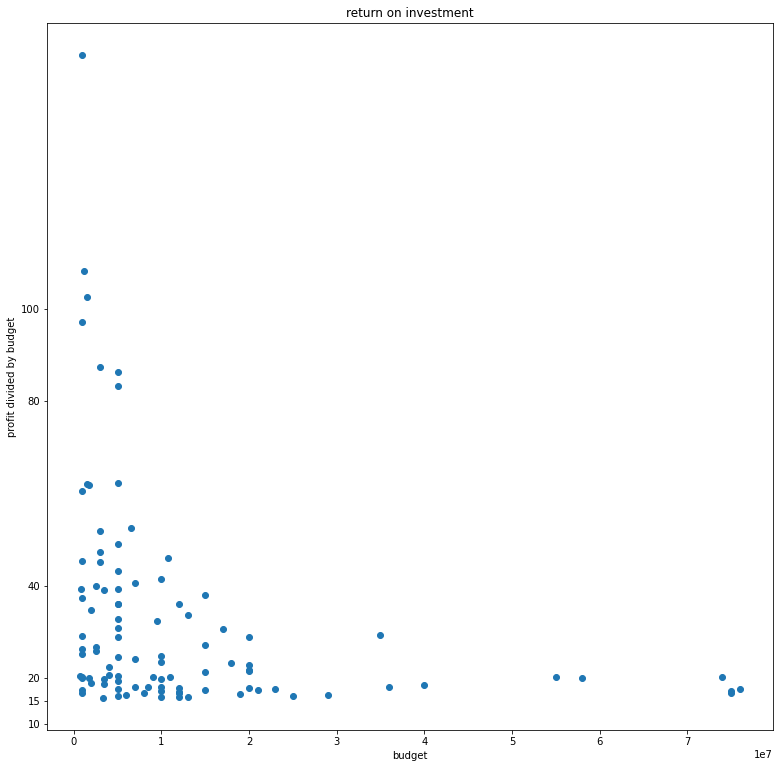

In [585]:
#tndfp = tndf[(tndf['net_profit'] >= 0)]
plot_three_fig, plot_three_ax = plt.subplots(figsize=(13,13))
plot_three_ax.scatter(top100['production_budget'], top100['return_on_investment'])
plt.yticks([10, 15, 20,40,80, 100])
plt.title('return on investment')
plt.ylabel('profit divided by budget')
plt.xlabel('budget')

In [627]:
top100.head(50)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,logged_budget,total_gross,net_profit,return_on_investment,date_month
5211,5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,13.815511,155022435,154022435,155.022435,1
5189,5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,13.955273,124532824,123382824,108.289412,3
5062,5062,63,2011-04-01,Insidious,1500000,54009150,99870886,14.220976,153880036,152380036,102.586691,4
5213,5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,13.815511,97153843,96153843,97.153843,4
4664,4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,14.914123,262264939,259264939,87.421646,10
4248,4248,49,2017-02-24,Get Out,5000000,176040665,255367951,15.424948,431408616,426408616,86.281723,2
4249,4249,50,2017-01-20,Split,5000000,138141585,278964806,15.424948,417106391,412106391,83.421278,1
4250,4250,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,15.424948,311068651,306068651,62.213730,10
5063,5063,64,2016-10-21,Moonlight,1500000,27854931,65245512,14.220976,93100443,91600443,62.066962,10
5014,5014,15,2010-08-27,The Last Exorcism,1800000,41034350,70165900,14.403297,111200250,109400250,61.777917,8


In [586]:
top100 = top250.sort_values(by = 'return_on_investment', ascending=False).head(100)

In [593]:
month = top100['release_date'].apply(lambda x: x.month)
top100['date_month'] = month

In [591]:
top100 = top100[top100.release_date.dt.month]

KeyError: "None of [Int64Index([ 1,  3,  4,  4, 10,  2,  1, 10, 10,  8,  5, 10,  6,  9,  8,  5,  8,\n            10,  7, 10,  6,  1, 12, 10,  4, 11,  7, 10,  3,  6,  9, 12,  9, 12,\n            10,  4,  9,  3,  8, 12,  8,  7, 12,  7,  7,  8,  1,  3,  1,  5,  7,\n             1, 11,  3, 11,  7,  9,  8,  7, 12,  7,  4, 11,  9,  2,  6,  2,  7,\n             6,  3,  2,  2,  5,  3, 10,  1, 11,  1, 11,  7, 11, 11, 10, 10,  6,\n             6,  4,  9, 11,  2,  7,  6,  5,  5,  5, 12,  4,  5,  7, 10],\n           dtype='int64')] are in the [columns]"

In [608]:
top100.groupby('date_month').count().id

date_month
1      8
2      6
3      7
4      7
5      8
6      8
7     13
8      7
9      7
10    13
11     9
12     7
Name: id, dtype: int64

Text(0.5, 1.0, 'Movie Profitability Throughout The Year')

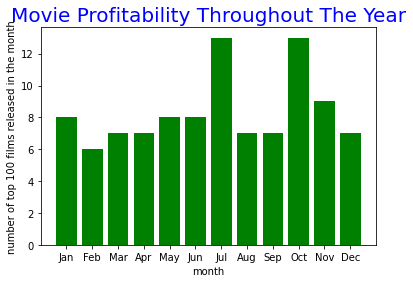

In [621]:
fig, ax = plt.subplots()
ax.bar(top100.groupby('date_month').count().id.index, top100.groupby('date_month').count().id, color='green')
ax.set_xlabel('month')
ax.set_ylabel('number of top 100 films released in the month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title('Movie Profitability Throughout The Year', color='blue', fontsize=20)